In [104]:
########### create data points that simulates the pendulum motion

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [105]:
# define constants
T = 40
dt = 0.0001
t_axis = np.arange(0, T, dt)

In [106]:
# create a function that simulates the pendulum motion
def pendulum_motion(theta):
    return -10*np.sin(theta)

In [107]:
# simulate the pendulum motion

# defin the initial conditions
theta = [0]
dtheta = [np.pi/2]
ddtheta = [0]

for t in range(len(t_axis)):
    # update the ddtheta
    ddtheta.append(pendulum_motion(theta[t]))
    # update the dtheta
    dtheta.append(dtheta[t] + ddtheta[t] * dt)
    # update the theta
    theta.append(theta[t] + dtheta[t] * dt)

theta = theta[:-1]
dtheta = dtheta[:-1]
ddtheta = ddtheta[:-1]


400000 400000


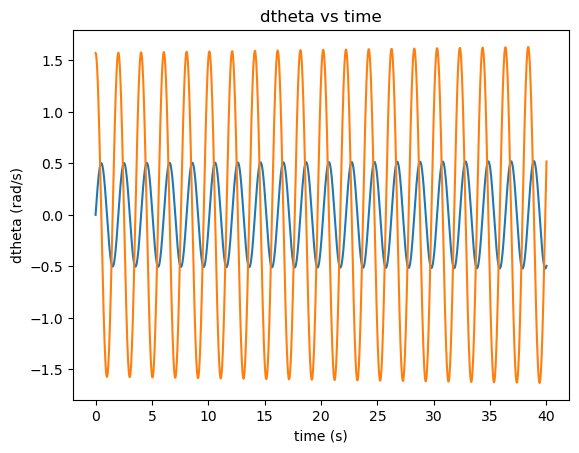

In [108]:
# plot the results
print (len(t_axis),len(theta))

# plot theta vs t
plt.plot(t_axis, theta)
plt.xlabel('time (s)')
plt.ylabel('theta (rad)')
plt.title('theta vs time')


# plot dtheta vs t
plt.plot(t_axis, dtheta)
plt.xlabel('time (s)')
plt.ylabel('dtheta (rad/s)')
plt.title('dtheta vs time')

# plot ddtheta vs t

plt.show()

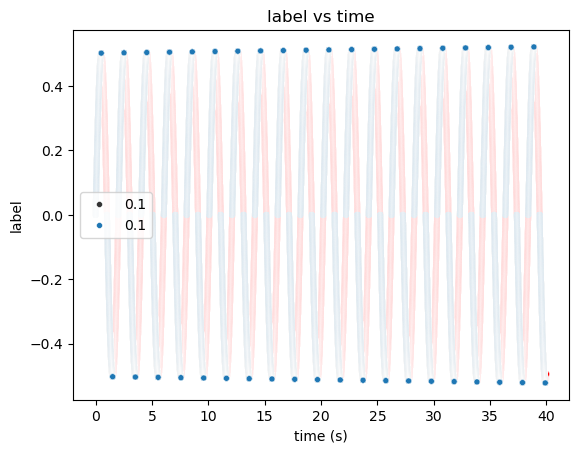

In [136]:
# save the data into a dataframe

data = pd.DataFrame({'t': t_axis, 'theta': theta, 'dtheta': dtheta, 'ddtheta': ddtheta})


# set label to 1 if the dtheta > = 
data["label"] = 0

# set label to 1 if the dtheta > 0 and theta < 0 
data.loc[(data['dtheta'] > 0) & (data['theta'] < 0), 'label'] = 1
# set label to 1 if the dtheta < 0 and theta > 0
data.loc[(data['dtheta'] < 0) & (data['theta'] > 0), 'label'] = 1

# plot label vs t with colour by label
sns.scatterplot(x='t', y='theta', data=data[data['label'] == 1],size = 0.1, c = 'r')
sns.scatterplot(x='t', y='theta', data=data[data['label'] == 0],size = 0.1)

# sns.scatterplot(x='dtheta', y='theta', data=data, hue='label', palette='Set1')
plt.xlabel('time (s)')
plt.ylabel('label')
plt.title('label vs time')
plt.show()


In [110]:
# split the pandas data into train and test
train = data[data['t'] < int(0.8*T)]
test = data[data['t'] >= int(0.8*T)]


In [139]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Define the neural network architecture
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Hyperparameters
input_size = 2
hidden_size = 2
num_classes = 2
learning_rate = 0.001
batch_size = 10
num_epochs = 5

# Load dataset with theta, dtheta, ddtheta and label
train_dataset = TensorDataset(torch.tensor(train.drop(columns=['label', 'ddtheta', 't']).values).float(), torch.tensor(train['label'].values))
test_dataset = TensorDataset(torch.tensor(test.drop(columns=['label','ddtheta','t']).values).float(), torch.tensor(test['label'].values))

# load dataset with ttea 
# train_dataset = TensorDataset(torch.tensor(train["theta"].values).float(), torch.tensor(train['label'].values))
# test_dataset = TensorDataset(torch.tensor(test["theta"].values).float(), torch.tensor(test['label'].values))
# # input_size = 1

# Data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
model = Classifier(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Testing the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Epoch [1/5], Step [100/32000], Loss: 0.6004
Epoch [1/5], Step [200/32000], Loss: 0.6450
Epoch [1/5], Step [300/32000], Loss: 0.7426
Epoch [1/5], Step [400/32000], Loss: 0.6415
Epoch [1/5], Step [500/32000], Loss: 0.6351
Epoch [1/5], Step [600/32000], Loss: 0.7228
Epoch [1/5], Step [700/32000], Loss: 0.6540
Epoch [1/5], Step [800/32000], Loss: 0.5881
Epoch [1/5], Step [900/32000], Loss: 0.6025
Epoch [1/5], Step [1000/32000], Loss: 0.6086
Epoch [1/5], Step [1100/32000], Loss: 0.5781
Epoch [1/5], Step [1200/32000], Loss: 0.5078
Epoch [1/5], Step [1300/32000], Loss: 0.5639
Epoch [1/5], Step [1400/32000], Loss: 0.4659
Epoch [1/5], Step [1500/32000], Loss: 0.4807
Epoch [1/5], Step [1600/32000], Loss: 0.5042
Epoch [1/5], Step [1700/32000], Loss: 0.4004
Epoch [1/5], Step [1800/32000], Loss: 0.4066
Epoch [1/5], Step [1900/32000], Loss: 0.4401
Epoch [1/5], Step [2000/32000], Loss: 0.3457
Epoch [1/5], Step [2100/32000], Loss: 0.3421
Epoch [1/5], Step [2200/32000], Loss: 0.4802
Epoch [1/5], Step [

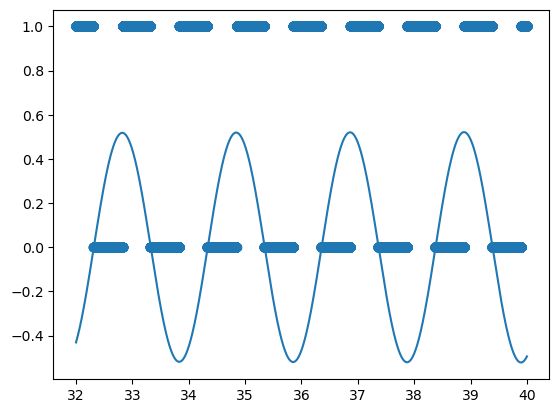

In [140]:
# plot the predicted labels 
predicted_labels = []
for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    predicted_labels.append(predicted)

predicted_labels = torch.cat(predicted_labels).numpy()
plt.scatter(test['t'], predicted_labels)
plt.plot(test['t'], test['theta'])
plt.show()


In [ ]:
# techincally, if we train with the acceleration, then it is the only dimension that we need 

In [142]:
# check the parameters of the model
for param in model.parameters():
    print(param)

# what are these params


Parameter containing:
tensor([[-5.2792, -1.6963],
        [ 5.3410,  1.7115]], requires_grad=True)
Parameter containing:
tensor([-2.3464, -2.3615], requires_grad=True)
Parameter containing:
tensor([[ 13.2960,  13.7629],
        [-13.9628, -13.2183]], requires_grad=True)
Parameter containing:
tensor([-4.9748,  4.8223], requires_grad=True)
